# Weather Prediction Project











The ***Machine learning Models used in the project*** are:

    1.K-Nearest Neighbour(KNN)
    
    2.Support Vector Machine(SVM)
    
    3.Gradient Boost (GB)
    
    4.Random Forest Classifier(RFC)


*  I also used ensembling at the end i.e. we used combination of multiple models  
to produce improved results.
*  Also used hyperparameter tuning



In [ ]:
#IMPORTING THE REQUIRED LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

from google.colab import files
import io

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))
data.head()

Saving seattle-weather.csv to seattle-weather.csv


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
uploaded = files.upload()

data2 =pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))
data2.head()

Saving seattle-weather.csv to seattle-weather.csv


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain





Taking the square root of the data can help to make it more normal for its analysis and comparison



In [ ]:
data2.precipitation=np.sqrt(data2.precipitation)
data2.wind=np.sqrt(data2.wind)
data2.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,12.8,5.0,2.167948,drizzle
1,2012-01-02,3.301515,10.6,2.8,2.121320,rain
2,2012-01-03,0.894427,11.7,7.2,1.516575,rain
3,2012-01-04,4.505552,12.2,5.6,2.167948,rain
4,2012-01-05,1.140175,8.9,2.8,2.469818,rain


In [ ]:
data.corr()

<ipython-input-5-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [ ]:
data2.corr()

<ipython-input-6-41dc7ecd48ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.336841,-0.127578,0.358559
temp_max,-0.336841,1.000000,0.875687,-0.129487
temp_min,-0.127578,0.875687,1.000000,-0.043813
wind,0.358559,-0.129487,-0.043813,1.000000


In [ ]:
data.shape


(1461, 6)

In [ ]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='weather', ylabel='count'>

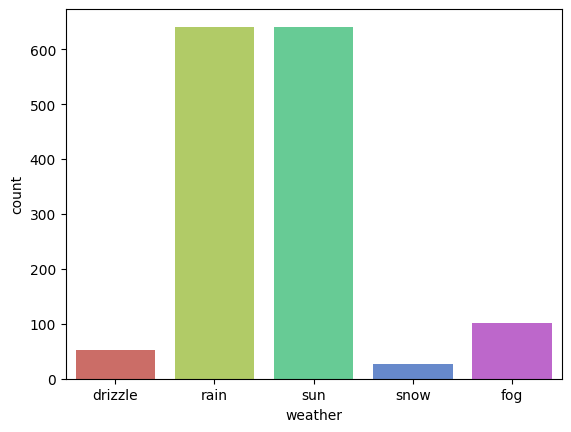

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather",data=data,palette="hls")

From the Above countplot the data set contains higher amount of data with the weather datail of ***Rain and Sun*** and it also have some additionals like ***drizzle,snow and fog*** .

In [ ]:
crain=len(data[data.weather=="rain"])
csun=len(data[data.weather=="sun"])
cdrizzle=len(data[data.weather=="drizzle"])
csnow=len(data[data.weather=="snow"])
cfog=len(data[data.weather=="fog"])
print("Probability of Rain:{:2f}".format((crain/(len(data.weather)))))
print("Probability of Sun:{:2f}".format((csun/(len(data.weather)))))
print("Probability of Drizzle:{:2f}".format((cdrizzle/(len(data.weather)))))
print("Probability of Snow:{:2f}".format((csnow/(len(data.weather)))))
print("Probability of Fog:{:2f}".format((cfog/(len(data.weather)))))

Probability of Rain:0.438741
Probability of Sun:0.438056
Probability of Drizzle:0.036277
Probability of Snow:0.017796
Probability of Fog:0.069131


<Axes: xlabel='wind', ylabel='Count'>

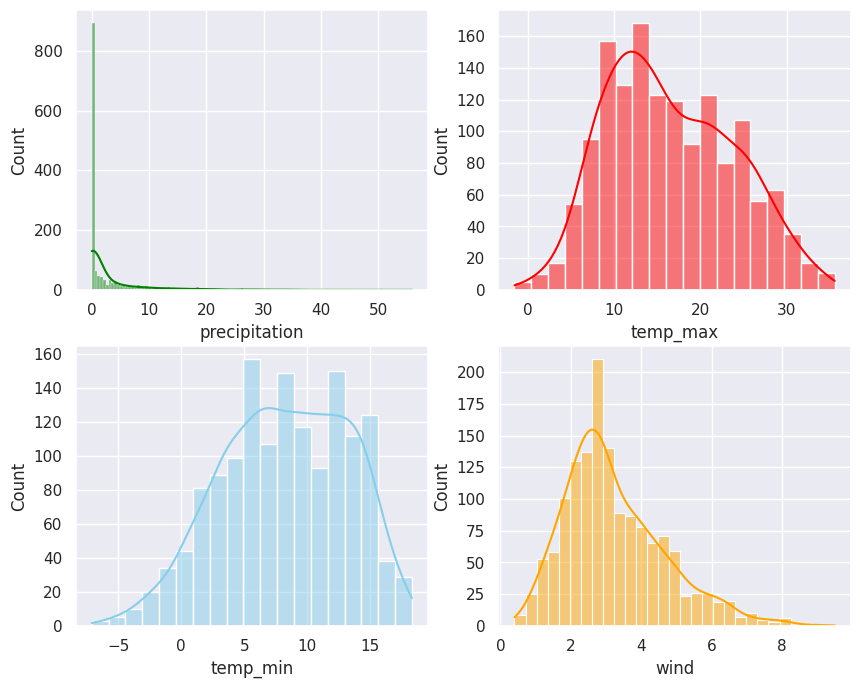

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

## OUTILERS DETECTION



* ***We can find the outliers in the dataset by using following plots:***

  1.**Hist plot**
  
  2.**Box plot**
  
  3.**Violin plot**
  
  4.**Dist plot**

# ***VIOLIN PLOT***

<Axes: xlabel='wind'>

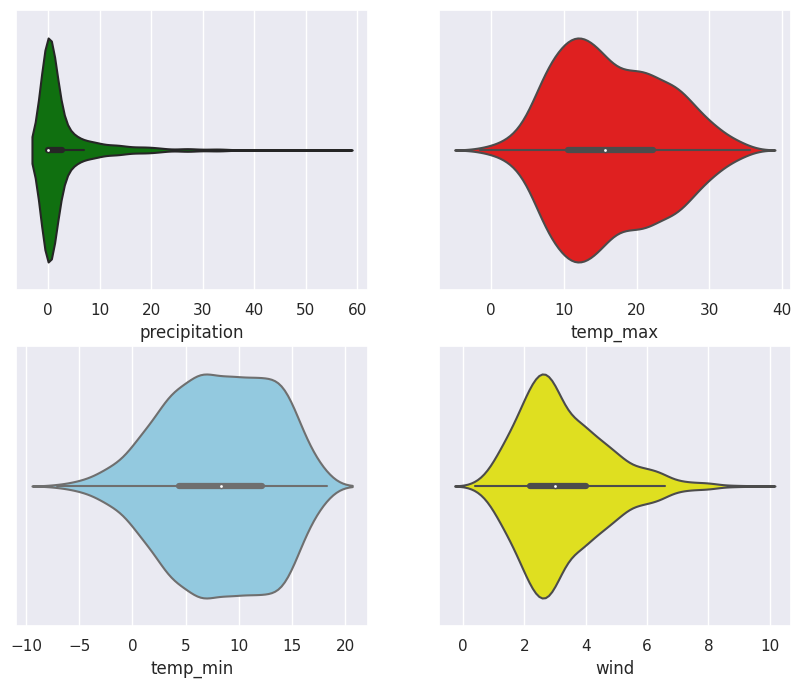

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

# ***BOXPLOT***


<Axes: xlabel='precipitation', ylabel='weather'>

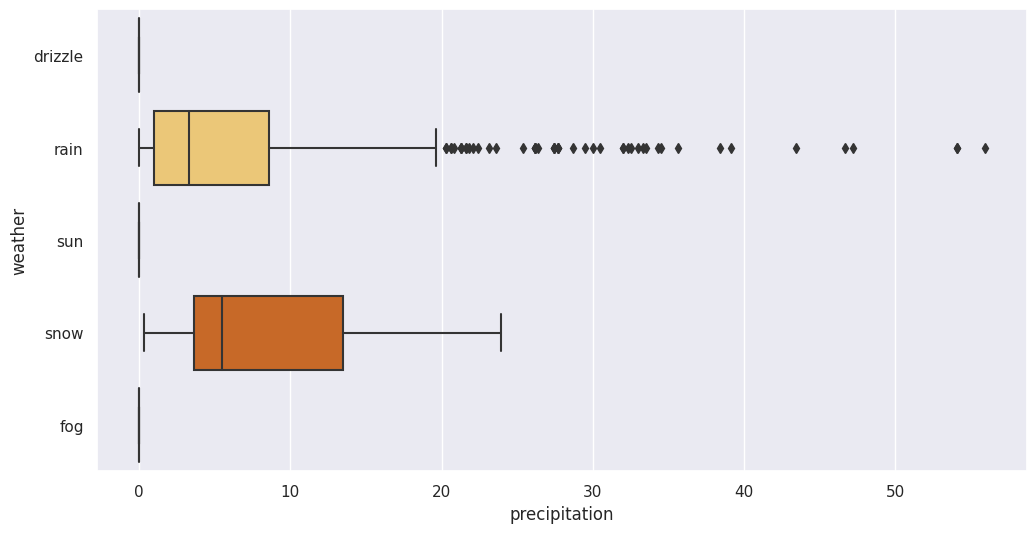

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="precipitation",y="weather",data=data,palette="YlOrBr")

From the above box plot between the ***Weather and Precipitation***
the value ***Rain*** has many **positive outliers** and both **Rain and Snow** were ***positively skewed/has positive skewness***.

<Axes: xlabel='temp_max', ylabel='weather'>

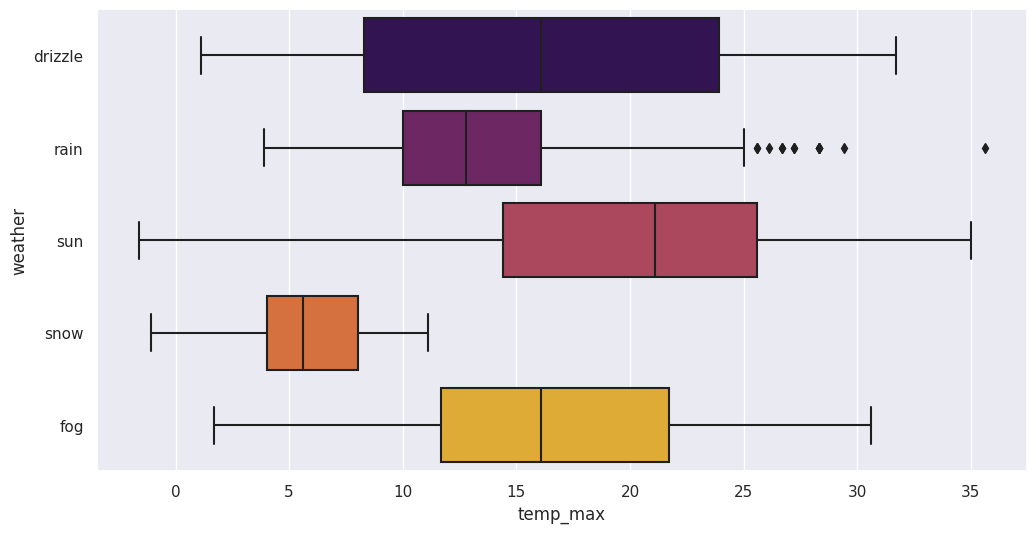

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_max",y="weather",data=data,palette="inferno")

<Axes: xlabel='wind', ylabel='weather'>

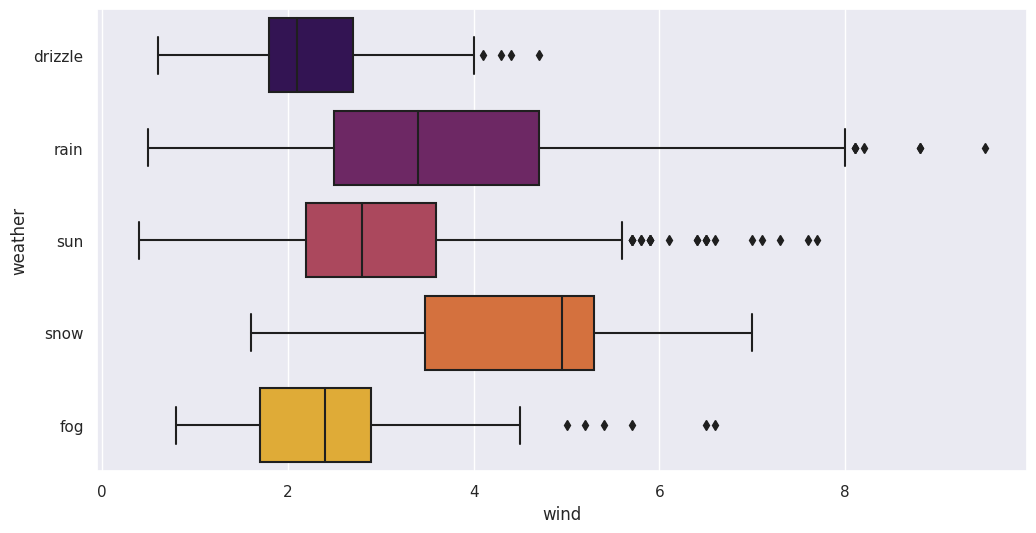

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="wind",y="weather",data=data,palette="inferno")

From the above box plots ,we came to know that Every ***attribute of weather*** has some ***positive outliers** and it is ***both types of skewness***.

<Axes: xlabel='temp_min', ylabel='weather'>

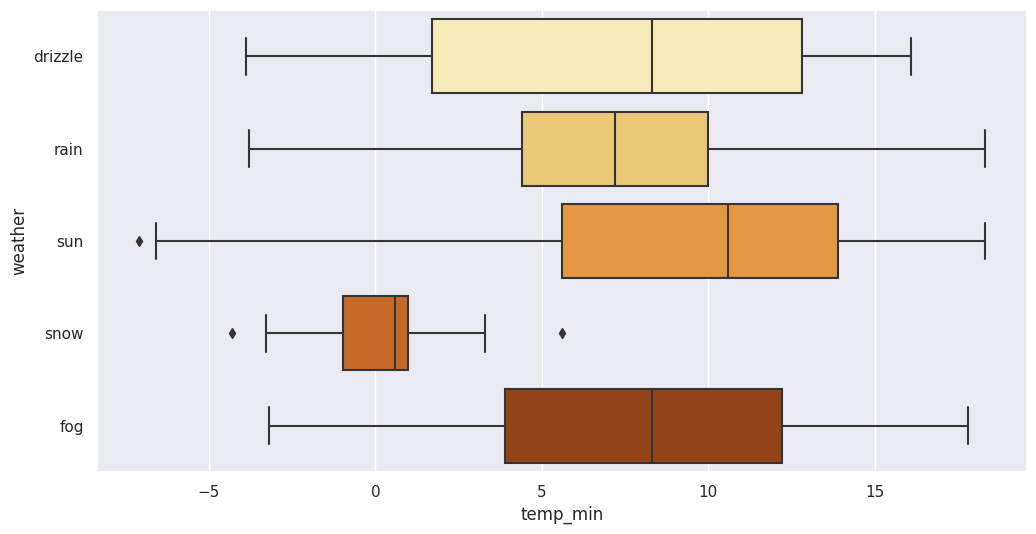

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_min",y="weather",data=data,palette="YlOrBr")

**HEATMAP:**

<Axes: >

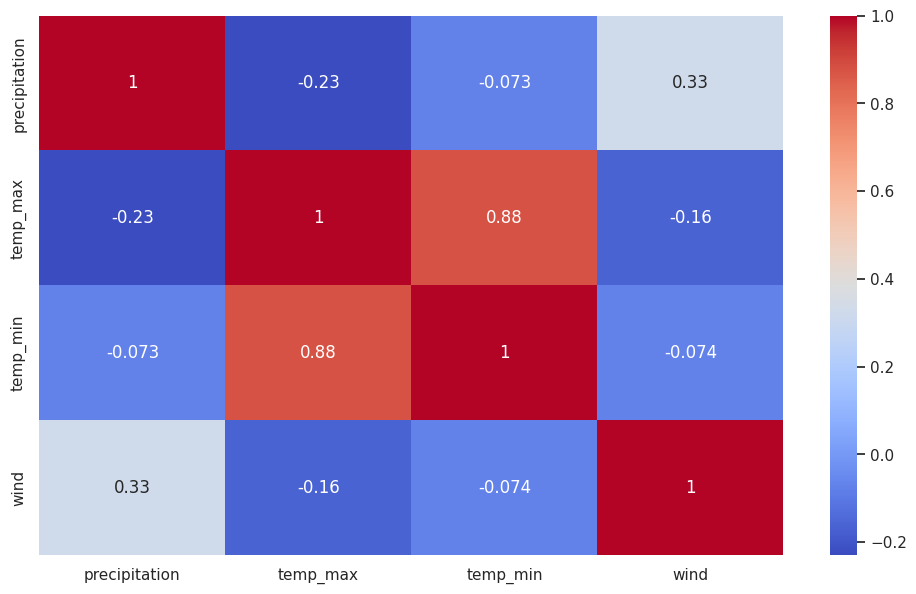

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

There is a ***positive correlation*** between ***temp_max and temp_min***.

Pearson correlation: -0.22855481643297046
T Test and P value: TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


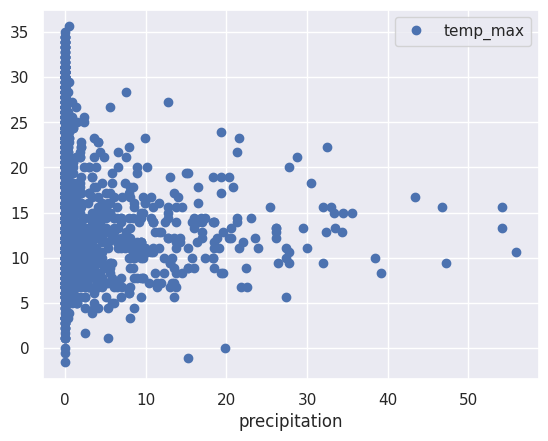

In [ ]:
data.plot("precipitation","temp_max",style='o')
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["temp_max"]))

Pearson correlation: -0.16485663487495486
T Test and P value: TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


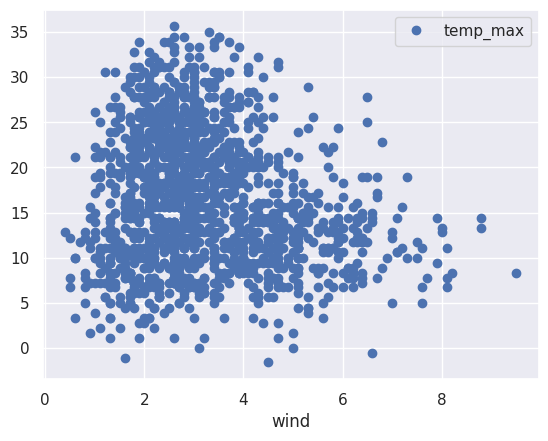

In [ ]:
data.plot("wind","temp_max",style='o')
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))

<Axes: xlabel='temp_max'>

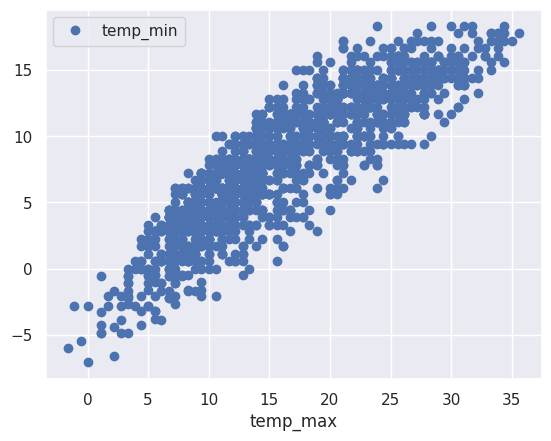

In [ ]:
data.plot("temp_max","temp_min",style='o')


## Pre-Processing

**Checking for Null values in the data set**

In [ ]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
data.isnull().any()


date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

**Drop Unnecessary Variables**

In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.

In [ ]:
df=data.drop(["date"],axis=1)

**Remove Outliers & Infinite Values**

Since this dataset contains ***Outliers ,it will be removed***,to make data set more even.

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


***Skewed Distribution Treatment***

In [ ]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=df,x="wind",kde=True,ax=axs[1,1],color='yellow')


<Axes: xlabel='wind'>

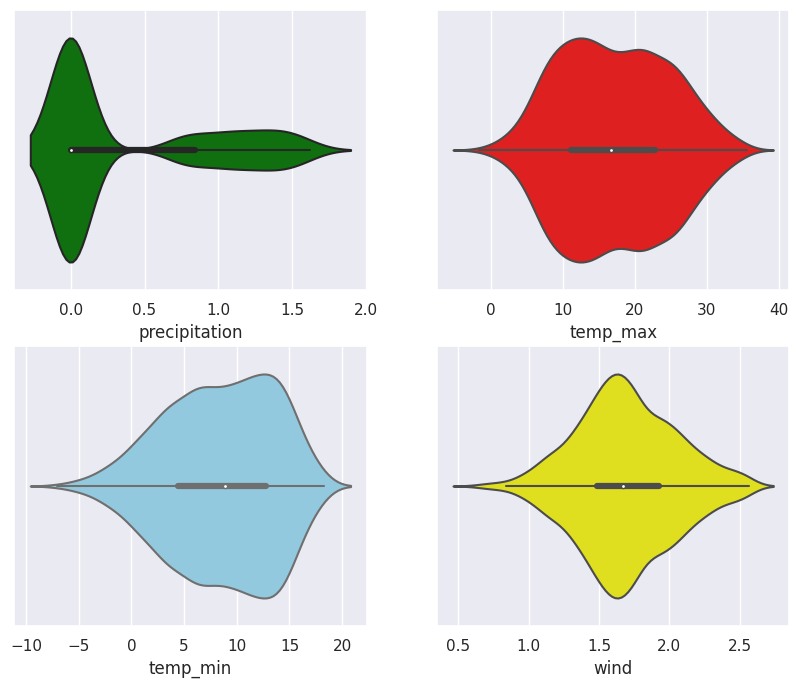

In [ ]:
#New for this copy:
df2 = df.copy()
df2.precipitation=np.sqrt(df2.precipitation)
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=df2,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=df2,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=df2,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=df2,x="wind",kde=True,ax=axs[1,1],color='yellow')


<Axes: xlabel='wind'>

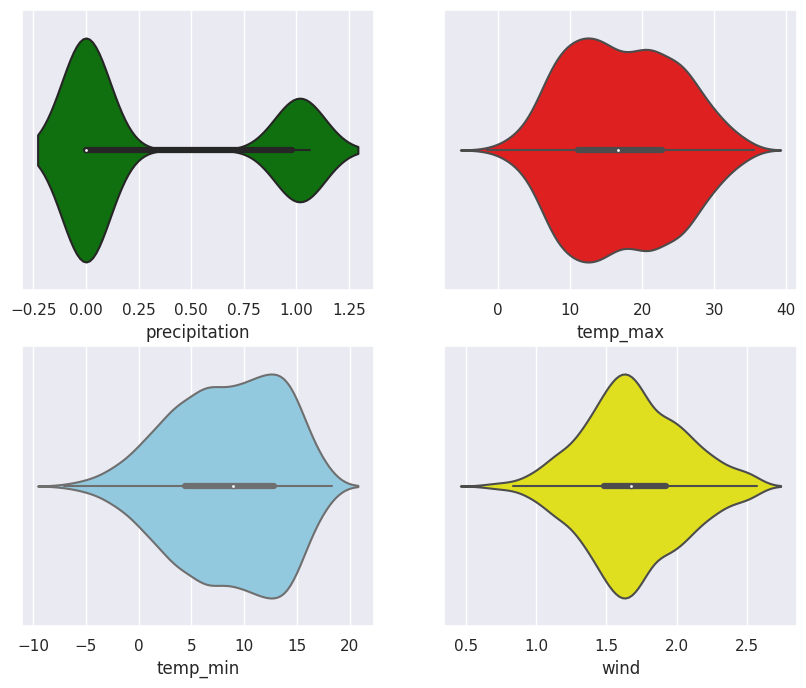

In [ ]:
df2.precipitation=np.sqrt(df2.precipitation)
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=df2,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=df2,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=df2,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=df2,x="wind",kde=True,ax=axs[1,1],color='yellow')

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


<Axes: xlabel='wind', ylabel='Count'>

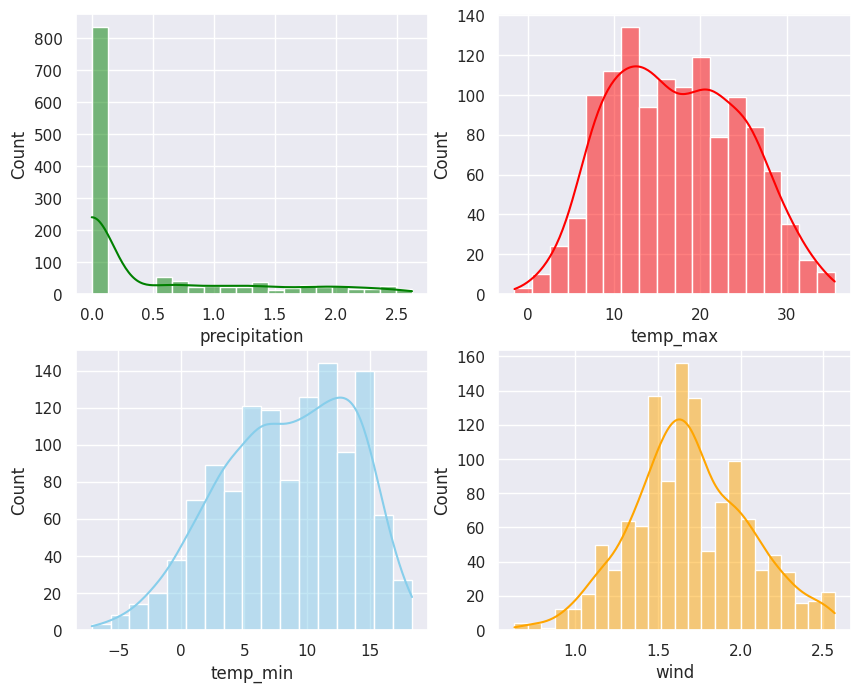

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

***Scaling the weather variables using label Encoder:***

<Axes: xlabel='wind'>

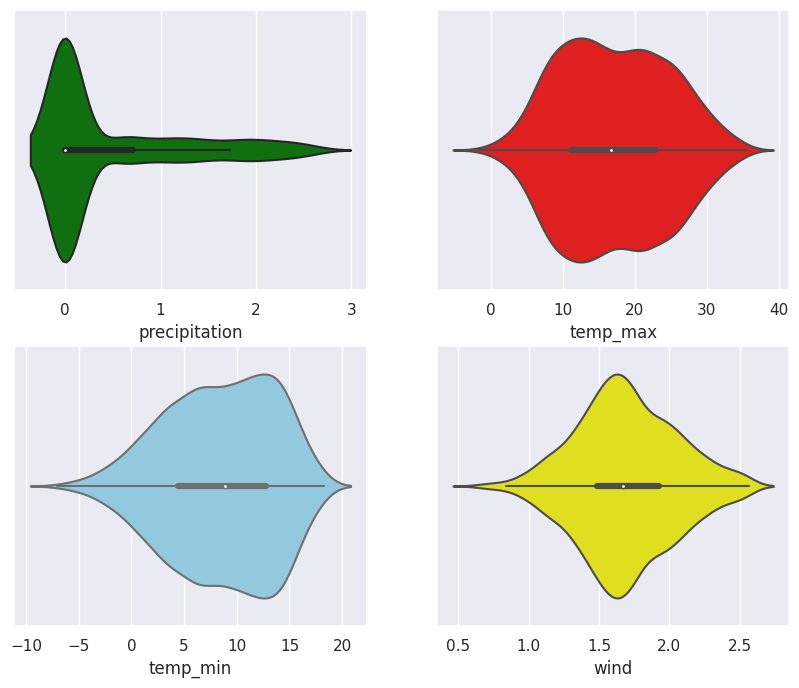

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=df,x="wind",kde=True,ax=axs[1,1],color='yellow')

In [ ]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [ ]:
df2 = df.copy()
df2['temp_avg'] = (df2['temp_max'] + df2['temp_min']) / 2
c = df2.corr()
c['weather']

precipitation   -0.405624
temp_max         0.302575
temp_min         0.158387
wind             0.038189
weather          1.000000
temp_avg         0.251032
Name: weather, dtype: float64

## SPLITTING THE DATASET

In [ ]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [ ]:
x2=((df2.loc[:,df2.columns!="weather"]).astype(int)).values[:,0:]
y2=df2["weather"].values

In [ ]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.1,random_state=42)

# MODEL TRAINING

**K-NEAREST NEIGHBOR CLASSIFIER:**

In [ ]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

# 10-fold cross-validation
scores1 = cross_val_score(knn, x_train,y_train, cv=10)
# Print the mean accuracy across all folds
print("KNN Cross Fold Mean accuracy: ", scores1.mean())

KNN Accuracy:66.40%
KNN Cross Fold Mean accuracy:  0.6683673469387755


In [ ]:
knn2=KNeighborsClassifier()
knn.fit(x_train2,y_train2)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test2,y_test2)*100))
scoresx = cross_val_score(knn2, x_train2,y_train2, cv=10)

print("Mean accuracy: ", scoresx.mean())

KNN Accuracy:67.74%
Mean accuracy:  0.67001638001638


In [ ]:
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-Validated Score:", best_score)


Best Hyperparameters: {'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
Best Cross-Validated Score: 0.7140074211502783


In [ ]:
best_knn = grid_search.best_estimator_
print(best_knn)

KNeighborsClassifier(n_neighbors=12, p=1)


In [ ]:
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(knn2, param_grid, cv=10, scoring='accuracy')

grid_search.fit(x_train2,y_train2)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-Validated Score:", best_score)

Best Hyperparameters: {'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}
Best Cross-Validated Score: 0.7106142506142507


**SUPPORT VECTOR CLASSIFIER**

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))
scores2 = cross_val_score(svm, x_train,y_train, cv=10)
print("Mean accuracy: ", scores2.mean())

SVM Accuracy:71.66%
Mean accuracy:  0.7129663986806845


In [ ]:
svm2=SVC()
svm2.fit(x_train2,y_train2)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))
scores2 = cross_val_score(svm2, x_train2,y_train2, cv=10)
print("Mean accuracy: ", scores2.mean())

SVM Accuracy:71.66%
Mean accuracy:  0.7096887796887797


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')

grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score2 = grid_search.best_score_
print("Best Cross-Validated Score:", best_score2)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Score: 0.7413832199546485


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search2 = GridSearchCV(svm2, param_grid, cv=10, scoring='accuracy')
grid_search2.fit(x_train2,y_train2)
best_params = grid_search2.best_params_
print("Best Hyperparameters:", best_params)

best_score2 = grid_search2.best_score_
print("Best Cross-Validated Score:", best_score2)


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Score: 0.7394103194103193


In [ ]:
best_svm = grid_search.best_estimator_


# Gradient Boost

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
scores4 = cross_val_score(gbc, x_train,y_train, cv=10)
print("Mean accuracy: ", scores4.mean())

Mean accuracy:  0.7271902700474129


In [ ]:
gbc2 = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gbc2, param_grid, cv=10 ,scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-Validated Score:", best_score)





Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Best Cross-Validated Score: 0.7525252525252525


In [ ]:
best_gbc = grid_search.best_estimator_


**Random Forest Classfier:**

In [ ]:
rfc = RandomForestClassifier()
scores3 = cross_val_score(rfc, x_train,y_train, cv=10)
print("Mean accuracy: ", scores3.mean())
print(scores3)

Mean accuracy:  0.6988352916924346
[0.68686869 0.67676768 0.74747475 0.67676768 0.65656566 0.6969697
 0.68367347 0.76530612 0.69387755 0.70408163]


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}

grid_search = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')


grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_score = grid_search.best_score_
print("Best Cross-Validated Score:", best_score)

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Score: 0.7444135229849514


In [ ]:
best_rfc = grid_search.best_estimator_


# Ensembling


*   'hard' for majority class voting
*   'soft' for class probabilities





In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('rfc', rfc),
        ('gbc', gbc)
    ],
    voting='hard'
)

ensemble.fit(x_train, y_train)

y_pred = ensemble.predict(x_test)

scores5 = cross_val_score(ensemble, x_train,y_train, cv=10)
print("Mean accuracy: ", scores5.mean())


Mean accuracy:  0.7160585446299732


In [ ]:
ensemble2 = VotingClassifier(
    estimators=[
        ('knn', best_knn),
        ('svm', best_svm),
        ('rfc', best_rfc),
        ('gbc',best_gbc)
    ],
    voting='hard'
)

ensemble2.fit(x_train, y_train)
y_pred = ensemble2.predict(x_test)
scores6 = cross_val_score(ensemble2, x_train,y_train, cv=10)
print("Mean accuracy: ", scores6.mean())


Mean accuracy:  0.7494537208822922


As we added new models, the Accuracy increased. Ulitmately after adding all 4 models, the accuracy was highest

#CHECKING FOR THE USER INPUT:

In [ ]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=ensemble2.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
